In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
data=pd.read_csv("data/linreg.csv")
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [23]:
dep=data['GPA']
ind=data['SAT']

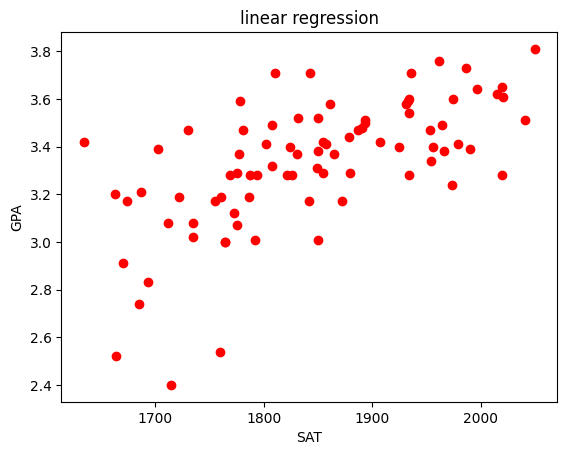

In [24]:
plt.scatter(ind,dep,color='red',marker='o')
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.title("linear regression")
plt.show()


In [25]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [26]:
x=sm.add_constant(ind)
res=sm.OLS(dep,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           7.20e-11
Time:                        10:33:34   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

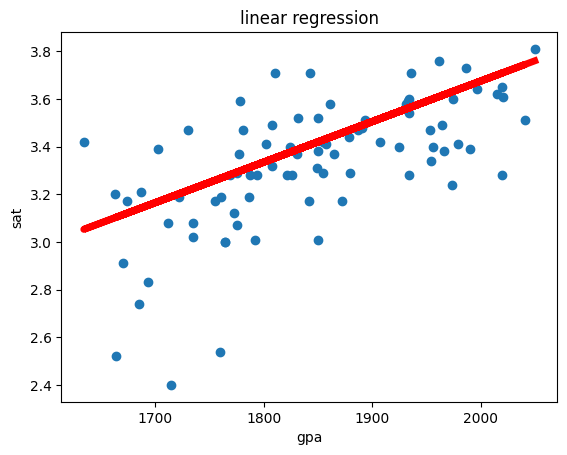

In [27]:
plt.scatter(ind,dep)
depvar=0.2750+0.0017*ind
plt.plot(ind,depvar,color='red',lw=5)
plt.xlabel("gpa")
plt.ylabel("sat")
plt.title("linear regression")
plt.show()

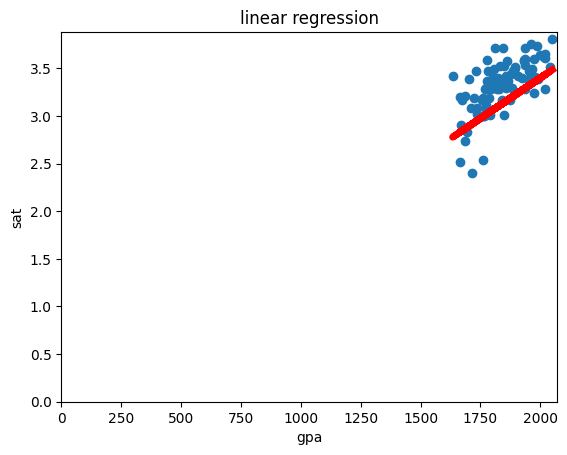

In [28]:
plt.scatter(ind,dep)
depvar=0+0.0017*ind
plt.plot(ind,depvar,color='red',lw=5)
plt.xlabel("gpa")
plt.ylabel("sat")
plt.title("linear regression")
plt.xlim(0)
plt.ylim(0)
plt.show()

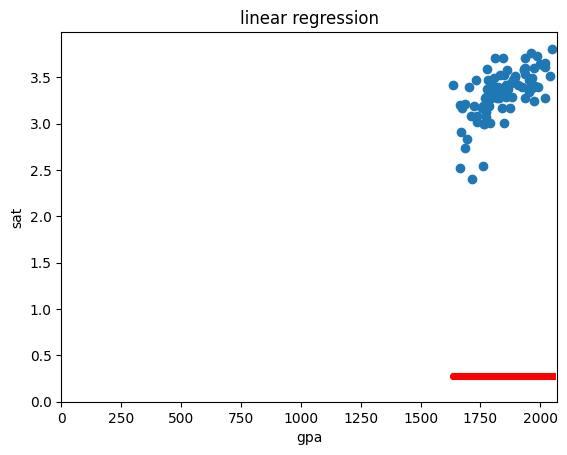

In [29]:
plt.scatter(ind,dep)
depvar=0.2750+0*ind
plt.plot(ind,depvar,color='red',lw=5)
plt.xlabel("gpa")
plt.ylabel("sat")
plt.title("linear regression")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [30]:
#how to treat dummies
rd=pd.read_csv('data/dummy.csv')
rd

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [31]:
new=rd.copy()
new['Attendance']=new['Attendance'].map({'Yes':1,'No':0})
new

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [32]:
d=new['GPA']
i=new[['SAT','Attendance']]


In [33]:
some=sm.add_constant(i)
resultsss=sm.OLS(d,some).fit()
resultsss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.19e-15
Time:                        10:33:35   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

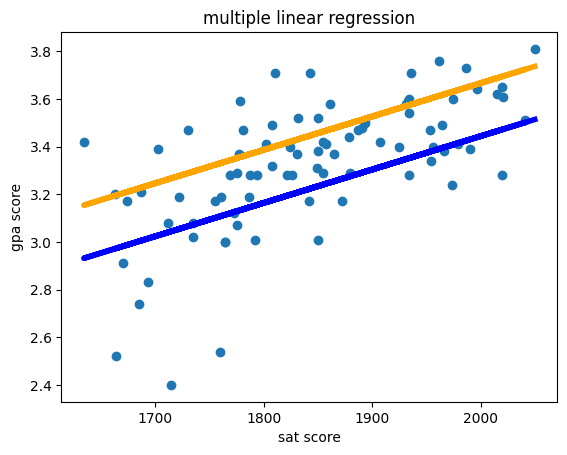

In [34]:
plt.scatter(new['SAT'],d)
yno=0.6439+0.0014*new['SAT']
yyes=0.8665+0.0014*new['SAT']
plt.plot(new['SAT'],yno,lw=4,c='blue')
plt.plot(new['SAT'],yyes,lw=4,c='orange')
plt.xlabel('sat score')
plt.ylabel('gpa score')
plt.title('multiple linear regression')
plt.show()

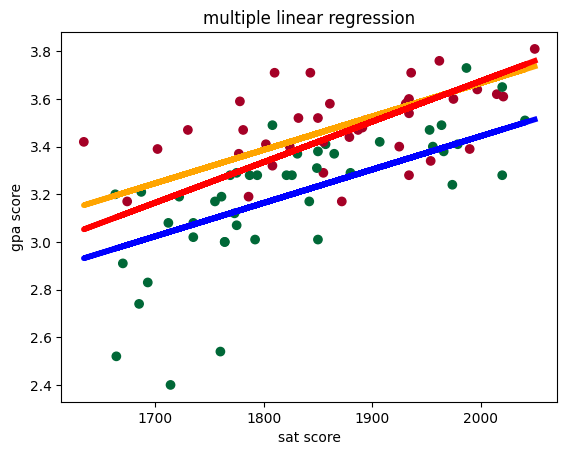

In [35]:
plt.scatter(new['SAT'],d,c=new['Attendance'],cmap='RdYlGn_r')
yno=0.6439+0.0014*new['SAT']
yyes=0.8665+0.0014*new['SAT']
yhat=0.2750+0.0017*new['SAT']
plt.plot(new['SAT'],yno,lw=4,c='blue')
plt.plot(new['SAT'],yyes,lw=4,c='orange')
plt.plot(new['SAT'],yhat,color='red',lw=4)
plt.xlabel('sat score')
plt.ylabel('gpa score')
plt.title('multiple linear regression')
plt.show()

In [36]:
some

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [37]:
testing=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
testing

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [38]:
pred=resultsss.predict(testing)
pred

0    3.023513
1    3.204163
dtype: float64

In [39]:
preddf=pd.DataFrame({'Predictions':pred})
joined=testing.join(preddf)
joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


In [40]:
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
